In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from  scipy.signal import welch 
from collections import defaultdict

In [27]:
positive_subject_dir = './healthy_20240612'
df= pd.read_csv('./healthy_20240612/label_poms.csv')
emotions_data = pd.read_csv('./healthy_20240612/label_poms.csv')

<Figure size 2000x1000 with 0 Axes>

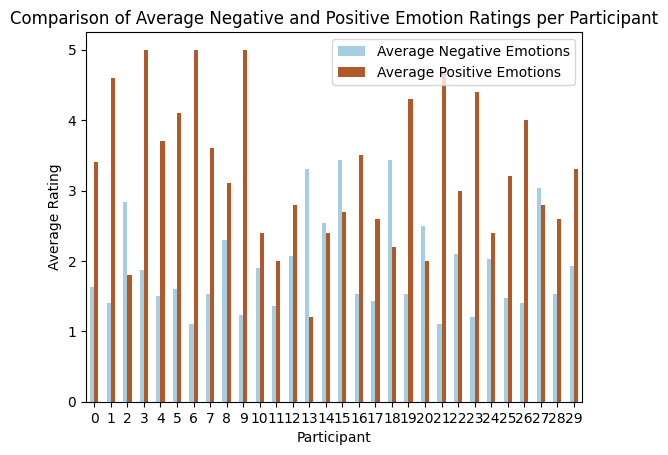

In [28]:
plt.figure(figsize=(20, 10))
# Defining negative and positive emotion categories
negative_emotions = ['1. Tense', '2. Anger', '3. Weary', '4. Unhappy', '6. Confused', 
                     '7. Embarrassed', '8. Uneasy', '9. Grouchy', '10. Fatigued', 
                     '11. Sad', '13. Can\'t concentrate', '15. Restless', '16. Peeved', 
                     '17. Worn out', '18. Discouraged', '20. Bewildered', '21. On-edge', 
                     '22. Annoyed', '23. Bushed', '24. Miserable', '26. Forgetful', 
                     '28. Nervous', '29. Resentful', '30. Exhausted', '31. Worthless', 
                     '33. Uncertain', '35. Anxious', '36. Furious', '37. Bitter', 
                     '38. Helpless']

positive_emotions = ['5. Cheerful', '12. Vigorous', '14. Confident', '19. Active', 
                     '25. Energetic', '27. Competent', '32. Lively', '34. Satisfied', 
                     '39. Full of pep', '40. Proud']

# Calculating average scores for negative and positive emotions for each participant using .loc
df.loc[:, 'Average Negative'] = df[negative_emotions].mean(axis=1)
df.loc[:, 'Average Positive'] = df[positive_emotions].mean(axis=1)


# Selecting a few participants to visualize
sample_data = df[['Average Negative', 'Average Positive']]

# Plotting

sample_data.plot(kind='bar', colormap='Paired')
plt.title('Comparison of Average Negative and Positive Emotion Ratings per Participant')
plt.ylabel('Average Rating')
plt.xlabel('Participant')
plt.xticks(ticks=range(30), labels=sample_data.index, rotation=0)
plt.legend(['Average Negative Emotions', 'Average Positive Emotions'])
plt.show()


In [33]:
df

,ID,1. Tense,2. Anger,3. Weary,4. Unhappy,5. Cheerful,6. Confused,7. Embarrassed,8. Uneasy,9. Grouchy,...,38. Helpless,39. Full of pep,40. Proud,41. Fatigue,Happy,Tension,SAD(2+4+11),Average Negative,Average Positive,Difference
0,A30,3,1,3,2,4,1,1,2,1,...,1,3,3,2.4,3.67,11,4,1.633333,3.4,1.766667
1,A29,2,1,2,1,5,1,2,2,1,...,1,5,4,1.8,4.67,9,3,1.400000,4.6,3.200000
2,A28,4,1,4,4,3,4,1,3,1,...,2,1,1,3.8,1.67,21,7,2.833333,1.8,1.033333
3,A27,1,1,1,1,5,1,1,1,1,...,1,5,5,1.8,5.00,14,3,1.866667,5.0,3.133333
4,A26,2,1,1,1,4,2,1,1,1,...,2,3,4,1.8,3.67,10,3,1.500000,3.7,2.200000
5,A25,2,1,1,1,4,2,1,2,1,...,1,4,4,2.2,4.00,11,3,1.600000,4.1,2.500000
6,A24,1,1,1,1,5,1,1,1,1,...,1,5,5,1.0,5.00,7,3,1.100000,5.0,3.900000
7,A23,1,1,1,1,4,2,1,2,1,...,1,4,3,1.6,4.00,11,3,1.533333,3.6,2.066667
8,A22,3,1,1,1,3,1,2,1,3,...,2,4,3,2.8,3.67,15,3,2.300000,3.1,0.800000
9,A21,2,1,1,1,5,1,1,1,1,...,1,5,5,1.4,5.00,11,3,1.233333,5.0,3.766667


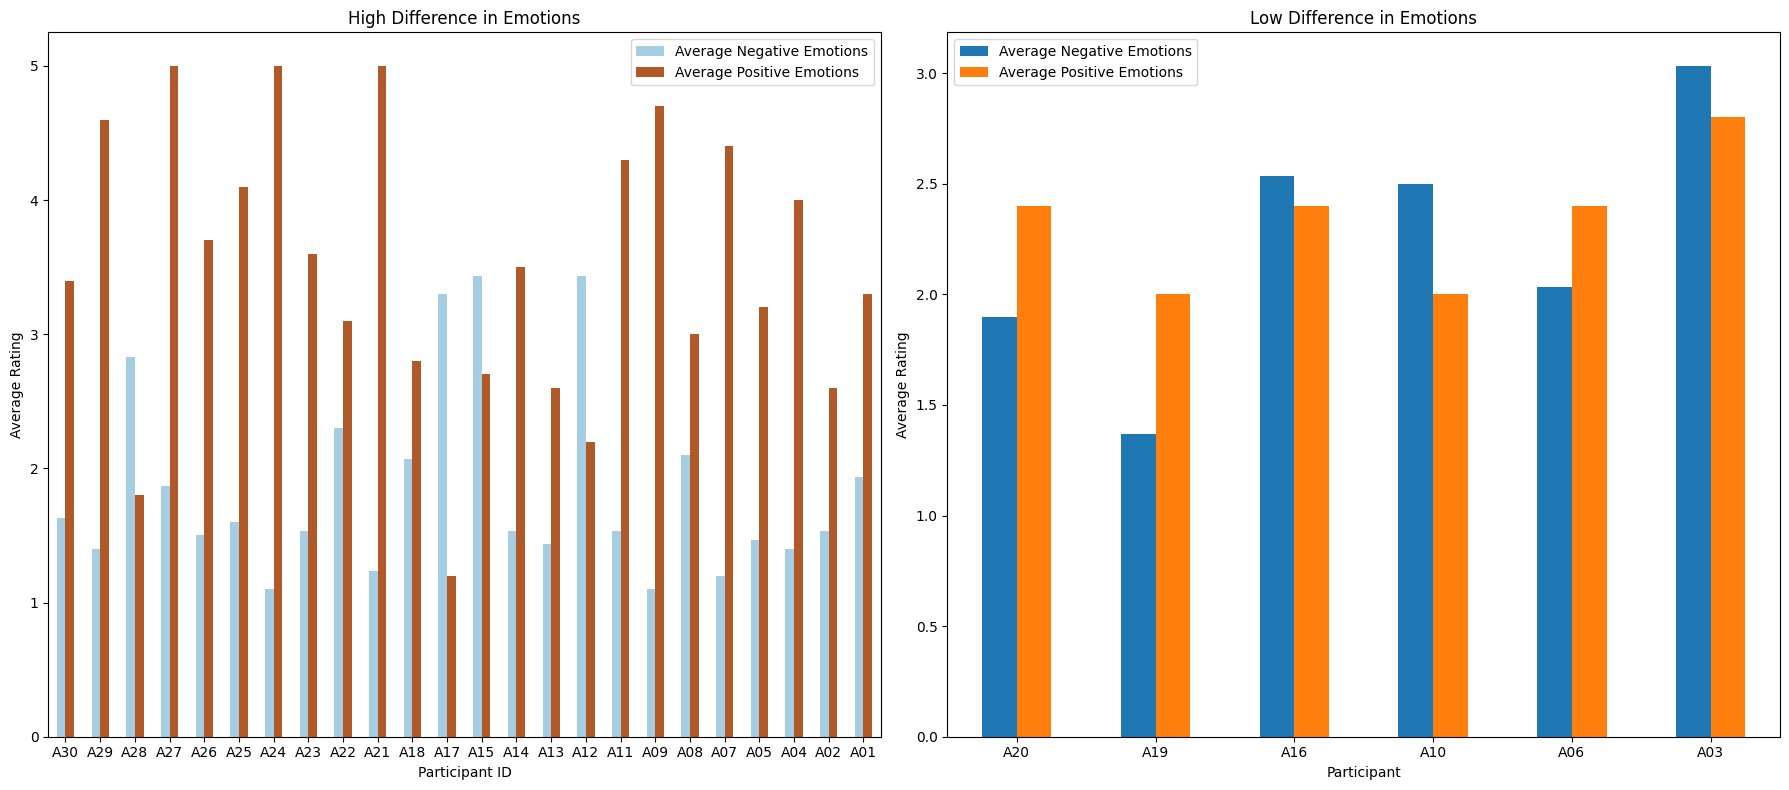

Total subjects with high difference:  24
Total subjects with low difference:  6


In [37]:
# Recalculating the difference and defining dataframes based on the threshold
df['Difference'] = abs(df['Average Negative'] - df['Average Positive'])
high_difference_data = df[df['Difference'] >= 0.73]
Low_difference_data = df[df['Difference'] < 0.73]

# Setting up the plot area with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot for high difference data
# Plot for high difference data
high_difference_data[['Average Negative', 'Average Positive']].plot(kind='bar', ax=axes[0], colormap='Paired')
axes[0].set_title('High Difference in Emotions')
axes[0].set_ylabel('Average Rating')
axes[0].set_xlabel('Participant ID')  # Change xlabel to Participant ID
axes[0].set_xticks(range(len(high_difference_data)))
axes[0].set_xticklabels(high_difference_data['ID'], rotation=0)  # Use ID column as xtick labels
axes[0].legend(['Average Negative Emotions', 'Average Positive Emotions'])

# Remaining code for the second plot, legend, and overall layout


# Plot for low difference data
Low_difference_data[['Average Negative', 'Average Positive']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Low Difference in Emotions')
axes[1].set_ylabel('Average Rating')
axes[1].set_xlabel('Participant')
axes[1].set_xticks(range(len(Low_difference_data)))
axes[1].set_xticklabels(Low_difference_data['ID'], rotation=0)
axes[1].legend(['Average Negative Emotions', 'Average Positive Emotions'])

plt.tight_layout()
plt.show()

# Output the count of subjects in each category
print("Total subjects with high difference: ", len(high_difference_data))
print("Total subjects with low difference: ", len(Low_difference_data))


In [35]:
# Plot for high difference data
high_difference_data[['Average Negative', 'Average Positive']].plot(kind='bar', ax=axes[0], colormap='Paired')
axes[0].set_title('High Difference in Emotions')
axes[0].set_ylabel('Average Rating')
axes[0].set_xlabel('Participant ID')  # Change xlabel to Participant ID
axes[0].set_xticks(range(len(high_difference_data)))
axes[0].set_xticklabels(high_difference_data['ID'], rotation=0)  # Use ID column as xtick labels
axes[0].legend(['Average Negative Emotions', 'Average Positive Emotions'])

# Remaining code for the second plot, legend, and overall layout


In [2]:
directory = r'C:\Users\Administrator\Desktop\healthy'

In [3]:
files = os.listdir(directory)

In [222]:
def read_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            # print("reading json file: ", file_path)
            data = json.load(file)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    
def band_power(frequency, power_spectrum, band):
    band_indices = np.logical_and(frequency>= band[0], frequency<= band[1])
    return np.sum(power_spectrum[band_indices])



def spectrum(data,fs = 250, time = 0.9):
    npersg = time * fs
    frequency, power_spectrum = welch(data,fs= fs, nperseg= npersg)
    delta = (0.5, 4) 
    theta = (4, 8)
    alpha = (8, 13)
    beta =  (13, 30)

    delta_band_power = band_power(frequency, power_spectrum, delta)
    theta_band_power = band_power(frequency, power_spectrum, theta)
    alpha_band_power = band_power(frequency, power_spectrum, alpha)
    beta_band_power = band_power(frequency, power_spectrum, beta)

    alpha_by_beta = alpha_band_power/beta_band_power
    theta_by_beta = theta_band_power/beta_band_power
    alpha_theta_beta = (theta_band_power + alpha_band_power)/beta_band_power   # (theta +alpha)/beta
    theta_alpha_by_theta_beta = (theta_band_power +alpha_band_power)/(theta_band_power + beta_band_power)

    results = {
        "delta_band_power": delta_band_power,
        "theta_band_power": theta_band_power,
        "alpha_band_power": alpha_band_power,
        "beta_band_power": beta_band_power,
        "alpha_by_beta": alpha_by_beta,
        "theta_by_beta": theta_by_beta,
        "alpha_theta_by_beta": alpha_theta_beta,
        "theta_alpha_by_theta_beta": theta_alpha_by_theta_beta
    }
    return results


def average(positive):

    left_columns = [
        'left_wave_result_delta_band_power', 'left_wave_result_theta_band_power',
        'left_wave_result_alpha_band_power', 'left_wave_result_beta_band_power',
        'left_wave_result_alpha_by_beta', 'left_wave_result_theta_by_beta',
        'left_wave_result_alpha_theta_by_beta', 'left_wave_result_theta_alpha_by_theta_beta'
    ]

    right_columns = [
        'right_wave_result_delta_band_power', 'right_wave_result_theta_band_power',
        'right_wave_result_alpha_band_power', 'right_wave_result_beta_band_power',
        'right_wave_result_alpha_by_beta', 'right_wave_result_theta_by_beta',
        'right_wave_result_alpha_theta_by_beta', 'right_wave_result_theta_alpha_by_theta_beta'
    ]

    # Calculate the average and create new columns
    for left_col, right_col in zip(left_columns, right_columns):
        avg_col_name = f'avg_{left_col.split("_", 1)[1]}'  # Create new column name based on left column name
        positive[avg_col_name] = (positive[left_col] + positive[right_col]) / 2
    return positive


def data1(r,subjects):
    res = defaultdict(dict)
    for i in subjects:
        subject = r[i]
        for side_wave in subject:
            bands = subject[side_wave]
            for j in bands:
                band = bands[j]
                name = side_wave+'_'+j
                res[i][name] =  band
    res = pd.DataFrame(res)
    res = res.T
    ave = average(res)
    return ave


def get_samples(base_dir: str, target_subjects: list):
    samples_ret = []
    sample_dict = defaultdict(dict)
    for subject in target_subjects:
        files = os.listdir(base_dir)
        for file in files:
            if file.startswith(subject):
                file_path = os.path.join(base_dir, file)
                json_data = read_json_file(file_path)
                left_wave_all, right_wave_all = [], []
                for raw_data in json_data['ProcessedDatas']:
                    left_wave = raw_data['LeftWave']
                    right_wave = raw_data['RightWave']

                    left_wave_all += left_wave
                    right_wave_all += right_wave
                left_result = spectrum(left_wave_all)
                right_result = spectrum(right_wave_all) 
        sample_dict[subject]=({"left_wave_result": left_result,"right_wave_result": right_result})
    final = data1(sample_dict,target_subjects)
    return sample_dict,final
                

In [223]:
a = ['A03', 'A42', 'A41', 'A10', 'A22', 'A06', 'A35', 'A15', 'A16', 'A54', 'A11', 'A18', 'A32', 'A17', 'A48', 'A28', 'A12']
b= ['A07', 'A52', 'A50', 'A36', 'A39', 'A49', 'A34', 'A51', 'A46', 'A19', 'A26', 'A04', 'A45', 'A24', 'A47', 'A23', 'A25', 'A09', 'A55', 'A40', 'A44', 'A43', 'A38', 'A02', 'A01', 'A13', 'A08', 'A21', 'A37', 'A53', 'A30', 'A05', 'A33', 'A20', 'A29']
subjects = a+b

In [224]:
_,positive = get_samples(base_dir= directory, target_subjects= a)
_,negative = get_samples(base_dir= directory, target_subjects= b)
_,all = get_samples(base_dir= directory, target_subjects= subjects)

<Axes: ylabel='Density'>

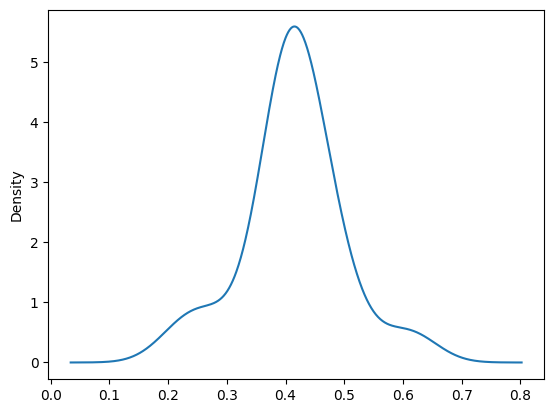

In [235]:
positive['avg_wave_result_theta_by_beta'].plot(kind='kde')

<Axes: >

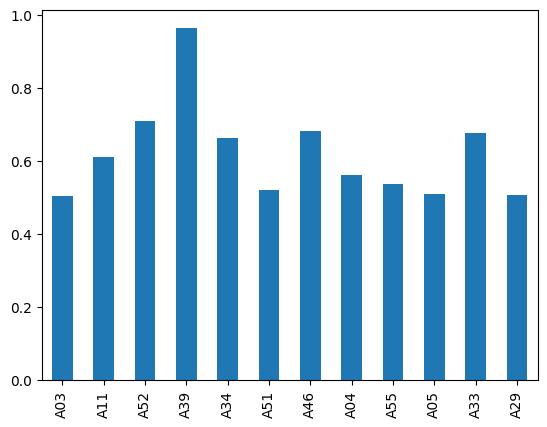

In [245]:
all[all['avg_wave_result_theta_by_beta']>=0.5]['avg_wave_result_theta_by_beta'].plot(kind = 'bar')

<Axes: >

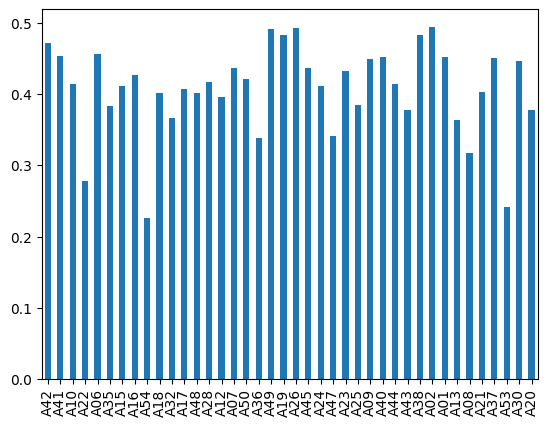

In [238]:
all[all['avg_wave_result_theta_by_beta']<0.5]['avg_wave_result_theta_by_beta'].plot(kind='bar')

In [285]:
negative_subject_actual = all[all['avg_wave_result_theta_by_beta']<0.5]['avg_wave_result_theta_by_beta'].index.to_list()
positive_subject_actual = all[all['avg_wave_result_theta_by_beta']>=0.5]['avg_wave_result_theta_by_beta'].index.to_list()

In [286]:
print( negative_subject_actual)

['A42', 'A41', 'A10', 'A22', 'A06', 'A35', 'A15', 'A16', 'A54', 'A18', 'A32', 'A17', 'A48', 'A28', 'A12', 'A07', 'A50', 'A36', 'A49', 'A19', 'A26', 'A45', 'A24', 'A47', 'A23', 'A25', 'A09', 'A40', 'A44', 'A43', 'A38', 'A02', 'A01', 'A13', 'A08', 'A21', 'A37', 'A53', 'A30', 'A20']


In [287]:
print(positive_subject_actual)

['A03', 'A11', 'A52', 'A39', 'A34', 'A51', 'A46', 'A04', 'A55', 'A05', 'A33', 'A29']


# Common between questiionnaire and actual

In [260]:
# Finding The total from PSS scale 
df_directory = '../../healthy_scale_results.xlsx'
df_fss = pd.read_excel(df_directory, sheet_name = 'FSS')
excluded_columns = ['Sex','Age (years)', 'weight（kg）','height']
df_fss.dropna(axis=0, inplace= True)
df_fss.drop(excluded_columns,axis = 1,inplace= True)
df_fss['Fatigue'] = df_fss.drop('ID',axis = 1).sum(axis = 1)

In [261]:
# Finding The total from POMS scale 
df_poms = pd.read_excel(df_directory, sheet_name='POMS')
selected_colums = ['ID', '3. Weary','10. Fatigued','17. Worn out','23. Bushed','30. Exhausted']
df_poms = df_poms[selected_colums]
df_poms['Fatigue'] = (df_poms.drop('ID',axis = 1).sum(axis=1)/5).round(1)

In [263]:
poms_excluded = df_fss['ID'].to_list()
excluded_subjects = ['A14','A27'] #+ poms_excluded
df = df_poms[~df_poms['ID'].isin(excluded_subjects)]
emotion = 'Fatigue'

In [298]:
negative_subject_actual = all[all['avg_wave_result_theta_by_beta']<0.4]['avg_wave_result_theta_by_beta'].index.to_list()
positive_subject_actual = all[all['avg_wave_result_theta_by_beta']>=0.4]['avg_wave_result_theta_by_beta'].index.to_list()

negative_subjects_poms = df[df[emotion]< 2.7]['ID'].to_list()
positive_subjects_poms = df[df[emotion]>= 2.7
                       ]['ID'].to_list()

negative_subjects = negative_subjects_poms #+ negative_subjects_PSS
positive_subjects = positive_subjects_poms #+ positive_subjects_PSS

In [339]:
print("Common in both questionnaire and actual of negative",set(negative_subjects) & set(negative_subject_actual))
print("Common in both questionnaire and actual of positive",set(positive_subjects) & set(positive_subject_actual))
print("Different in both questionnaire and actual",set(negative_subjects).symmetric_difference(set(negative_subject_actual)))
not_common = list(set(negative_subjects).symmetric_difference(set(negative_subject_actual)))
pos_common = list(set(not_common) & (set(positive_subjects)))
neg_common = list(set(not_common) & (set(negative_subjects)))
print(pos_common)


Common in both questionnaire and actual of negative {'A36', 'A20', 'A43', 'A08', 'A47', 'A25', 'A13', 'A53'}
Common in both questionnaire and actual of positive {'A03', 'A42', 'A48', 'A28', 'A11', 'A18', 'A10', 'A06', 'A41', 'A15', 'A17', 'A16'}
Different in both questionnaire and actual {'A32', 'A54', 'A09', 'A37', 'A24', 'A45', 'A22', 'A35', 'A04', 'A38', 'A07', 'A01', 'A49', 'A21', 'A44', 'A33', 'A19', 'A39', 'A29', 'A26', 'A12', 'A23', 'A30', 'A46', 'A50', 'A05', 'A02', 'A34', 'A51', 'A55', 'A40', 'A52'}
['A32', 'A54', 'A12', 'A22', 'A35']


<Axes: >

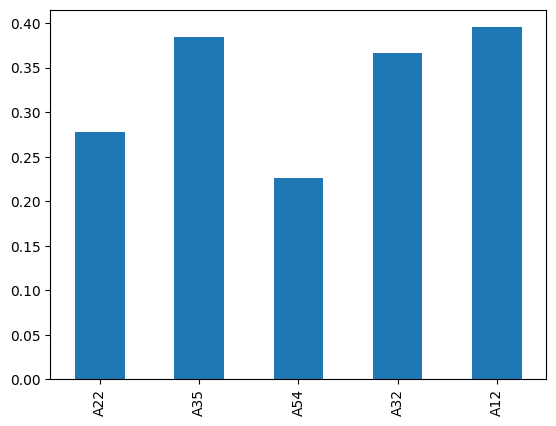

In [330]:
all[all.index.isin(pos_common)]['avg_wave_result_theta_by_beta'].plot(kind ='bar')

<Axes: xlabel='ID'>

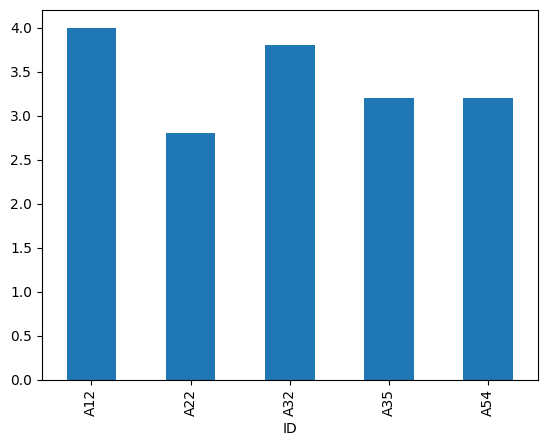

In [336]:
df_poms[df_poms['ID'].isin(pos_common)].set_index('ID')['Fatigue'].plot(kind='bar')


<Axes: >

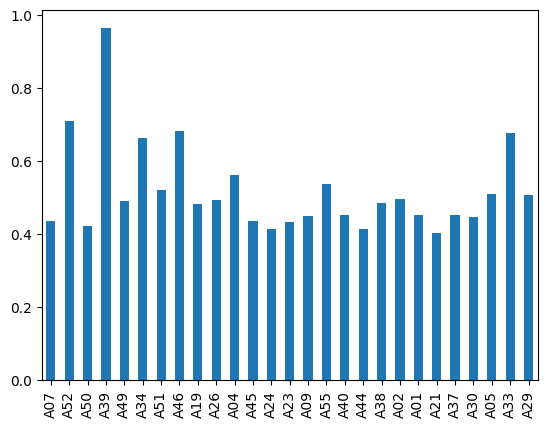

In [340]:
all[all.index.isin(neg_common)]['avg_wave_result_theta_by_beta'].plot(kind ='bar')

<Axes: xlabel='ID'>

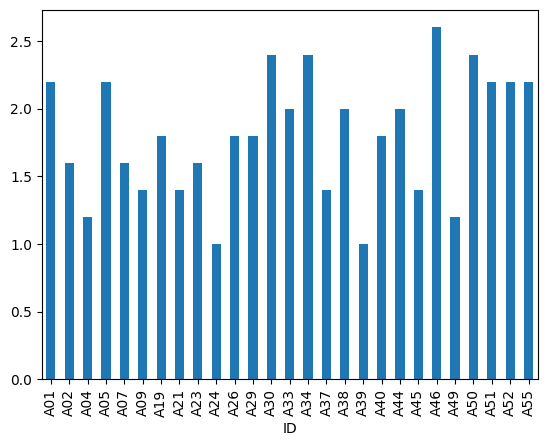

In [341]:
df_poms[df_poms['ID'].isin(neg_common)].set_index('ID')['Fatigue'].plot(kind='bar')